https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [62]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8940016846443605027
]


In [1]:
import numpy as np
np.random.seed(123)  # for reproducibility

In [2]:
from keras.models import Sequential

Using TensorFlow backend.


In [8]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 9s 1us/step


In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


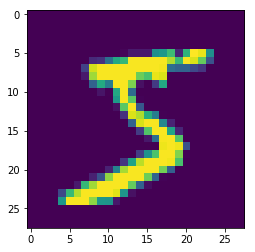

In [18]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])
plt.show()

In [26]:
X_train[0][14:17,14:17]

array([[240, 253, 253],
       [ 45, 186, 253],
       [  0,  16,  93]], dtype=uint8)

In [28]:
# (n, depth, width, height), MNIST images only have a depth of 1
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [29]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [31]:
X_train[0][0][14:17,14:17]

array([[ 0.94117647,  0.99215686,  0.99215686],
       [ 0.17647059,  0.72941178,  0.99215686],
       [ 0.        ,  0.0627451 ,  0.36470589]], dtype=float32)

In [35]:
print(y_train[:10])
print(y_test[:10])

[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


In [37]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_train[:10])
print(Y_test[:10])

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [38]:
model = Sequential()

In [54]:
from keras.layers import Conv2D

In [52]:
model.add(Convolution2D(32, 3, 3, activation='relu', 
                        input_shape=(1,28,28),  # 1st layer must get an `input_shape` or `batch_input_shape` argument.
                        dim_ordering='th'))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28..., data_format="channels_first")`
  


# dim_ordering: 'th' or 'tf'
set in ~/.keras/keras.json.
- In 'th' mode (Default), the channels dimension (the depth) is at index 1,   
- in 'tf' mode is it at index 3.   

In [53]:
model.add(Convolution2D(32, 3, 3, activation='relu'))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [58]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 24, 32)        7520      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 12, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 6, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1344)              0         
__________

In [60]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)